/Users/wintercyan/code/TreeSeg/standalone


/Users/wintercyan/opt/miniconda3/envs/treeseg/lib/python3.6/site-packages/rasterio/__init__.py:219: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(1000, 1000)
[  0 255]


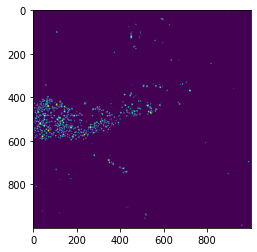

In [2]:
import cv2 as cv
from PIL import Image
from rasterio import open as rstopen
from os import path
from matplotlib import pyplot as plt
import numpy as np

if __name__ == '__main__':
    p = path.abspath(path.curdir)
    print(p)
    img = rstopen(path.join(p,'segmap_file/segmap.png')).read(1)
    partial = img[15000:16000, 5000:6000]
    print(partial.shape)
    print(np.unique(partial))
    # print(img.shape)
    plt.imshow(partial)
    plt.show()

In [36]:
from scipy import ndimage
par = img[10000:20000, 10000:20000]
# par = img
bb = par
bb = ndimage.meanf
# bb = ndimage.median_filter(bb, size=3)
# bb = ndimage.gaussian_filter(par, sigma=5)
# bb = np.clip(bb, 0, 255)
# bb[bb>0] = 255
# bb[bb<0] = 0
# print(np.unique(bb))
# plt.imshow(bb, cmap='binary')
plt.imsave('blured-segmap.png', bb)
# plt.show()

In [44]:
def mean_filter(img_arr:np.array, size:int):
    assert size>1 and size%2==1
    kernel_size = int((size-1)/2)
    new_arr = np.zeros_like(img_arr)
    height, width = img_arr.shape
    for r in range(height):
        for c in range(width):
            if (img_arr[r,c]==0): new_arr[r,c] = 0
            else:
                sum = 0
                for i in range(-kernel_size, kernel_size+1):
                    for j in range(-kernel_size, kernel_size+1):
                        pr = min(max(r+i,0),height-1)
                        pc = min(max(c+j,0),width-1)
                        sum += img_arr[pr, pc]
                # mean = int(sum/(size**2))
                mean = sum/(size**2)
                new_arr[r,c] = mean
    
    return new_arr

In [45]:
a = np.array([[0,1,2,3],[1,0,2,3],[2,3,0,4],[5,6,7,0]])
b = mean_filter(a, size=3)
print(b)

[[0 1 1 2]
 [1 0 2 2]
 [2 2 0 2]
 [4 4 3 0]]


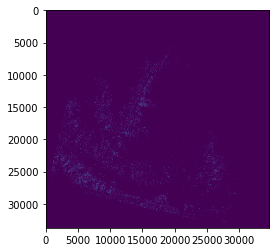

In [46]:
t = mean_filter(par, size=5)
plt.imshow(t)
plt.show()

In [37]:
for i in range(-3, 4):
    print(i)

-3
-2
-1
0
1
2
3


In [20]:
def filter_recur(img, sigma, t):
    b = img
    for i in range(t):
        b = ndimage.gaussian_filter(b, sigma=sigma)
        b[b>0.0] = 255
        b[b<0.0] = 0

    return b

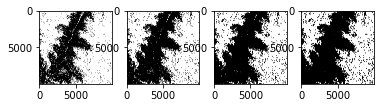

In [21]:
kernels = [3,5,7,9]
# kernels = [3]
blur = ndimage.gaussian_filter(par, sigma=7)

fig = plt.figure()

for (i,k) in enumerate(kernels):
    b = filter_recur(par, k, 3)
    fig.add_subplot(2,4,i+1)
    plt.imshow(b, cmap='binary')
    plt.imsave(f'blur-{k}.png', b)

plt.show()
